<a href="https://colab.research.google.com/github/Ronitbera/Stock_Data/blob/main/Stock_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyze daily/weekly/monthly trends of stock prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the CSV file
df = pd.read_csv('/content/stocks.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter for one stock, e.g., Apple (AAPL)
df = df[df['Ticker'] == 'AAPL']

# Set date as index
df.set_index('Date', inplace=True)

# Preview data
print(df.head())


           Ticker        Open        High         Low       Close   Adj Close  \
Date                                                                            
2023-02-07   AAPL  150.639999  155.229996  150.639999  154.649994  154.414230   
2023-02-08   AAPL  153.880005  154.580002  151.169998  151.919998  151.688400   
2023-02-09   AAPL  153.779999  154.330002  150.419998  150.869995  150.639999   
2023-02-10   AAPL  149.460007  151.339996  149.220001  151.009995  151.009995   
2023-02-13   AAPL  150.949997  154.259995  150.919998  153.850006  153.850006   

              Volume  
Date                  
2023-02-07  83322600  
2023-02-08  64120100  
2023-02-09  56007100  
2023-02-10  57450700  
2023-02-13  62199000  


In [3]:
# Daily closing price (already available)
daily_close = df['Close']

# Weekly average closing price
weekly_close = df['Close'].resample('W').mean()

# Monthly average closing price
monthly_close = df['Close'].resample('M').mean()

<ipython-input-3-1554533953>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['Close'].resample('M').mean()


In [4]:
# 10-day and 50-day moving averages
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

In [5]:
# 7-day rolling standard deviation as a proxy for volatility
df['Volatility'] = df['Close'].rolling(window=7).std()

In [6]:
# Daily return
df['Daily_Return'] = df['Close'].pct_change()

# Cumulative return
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

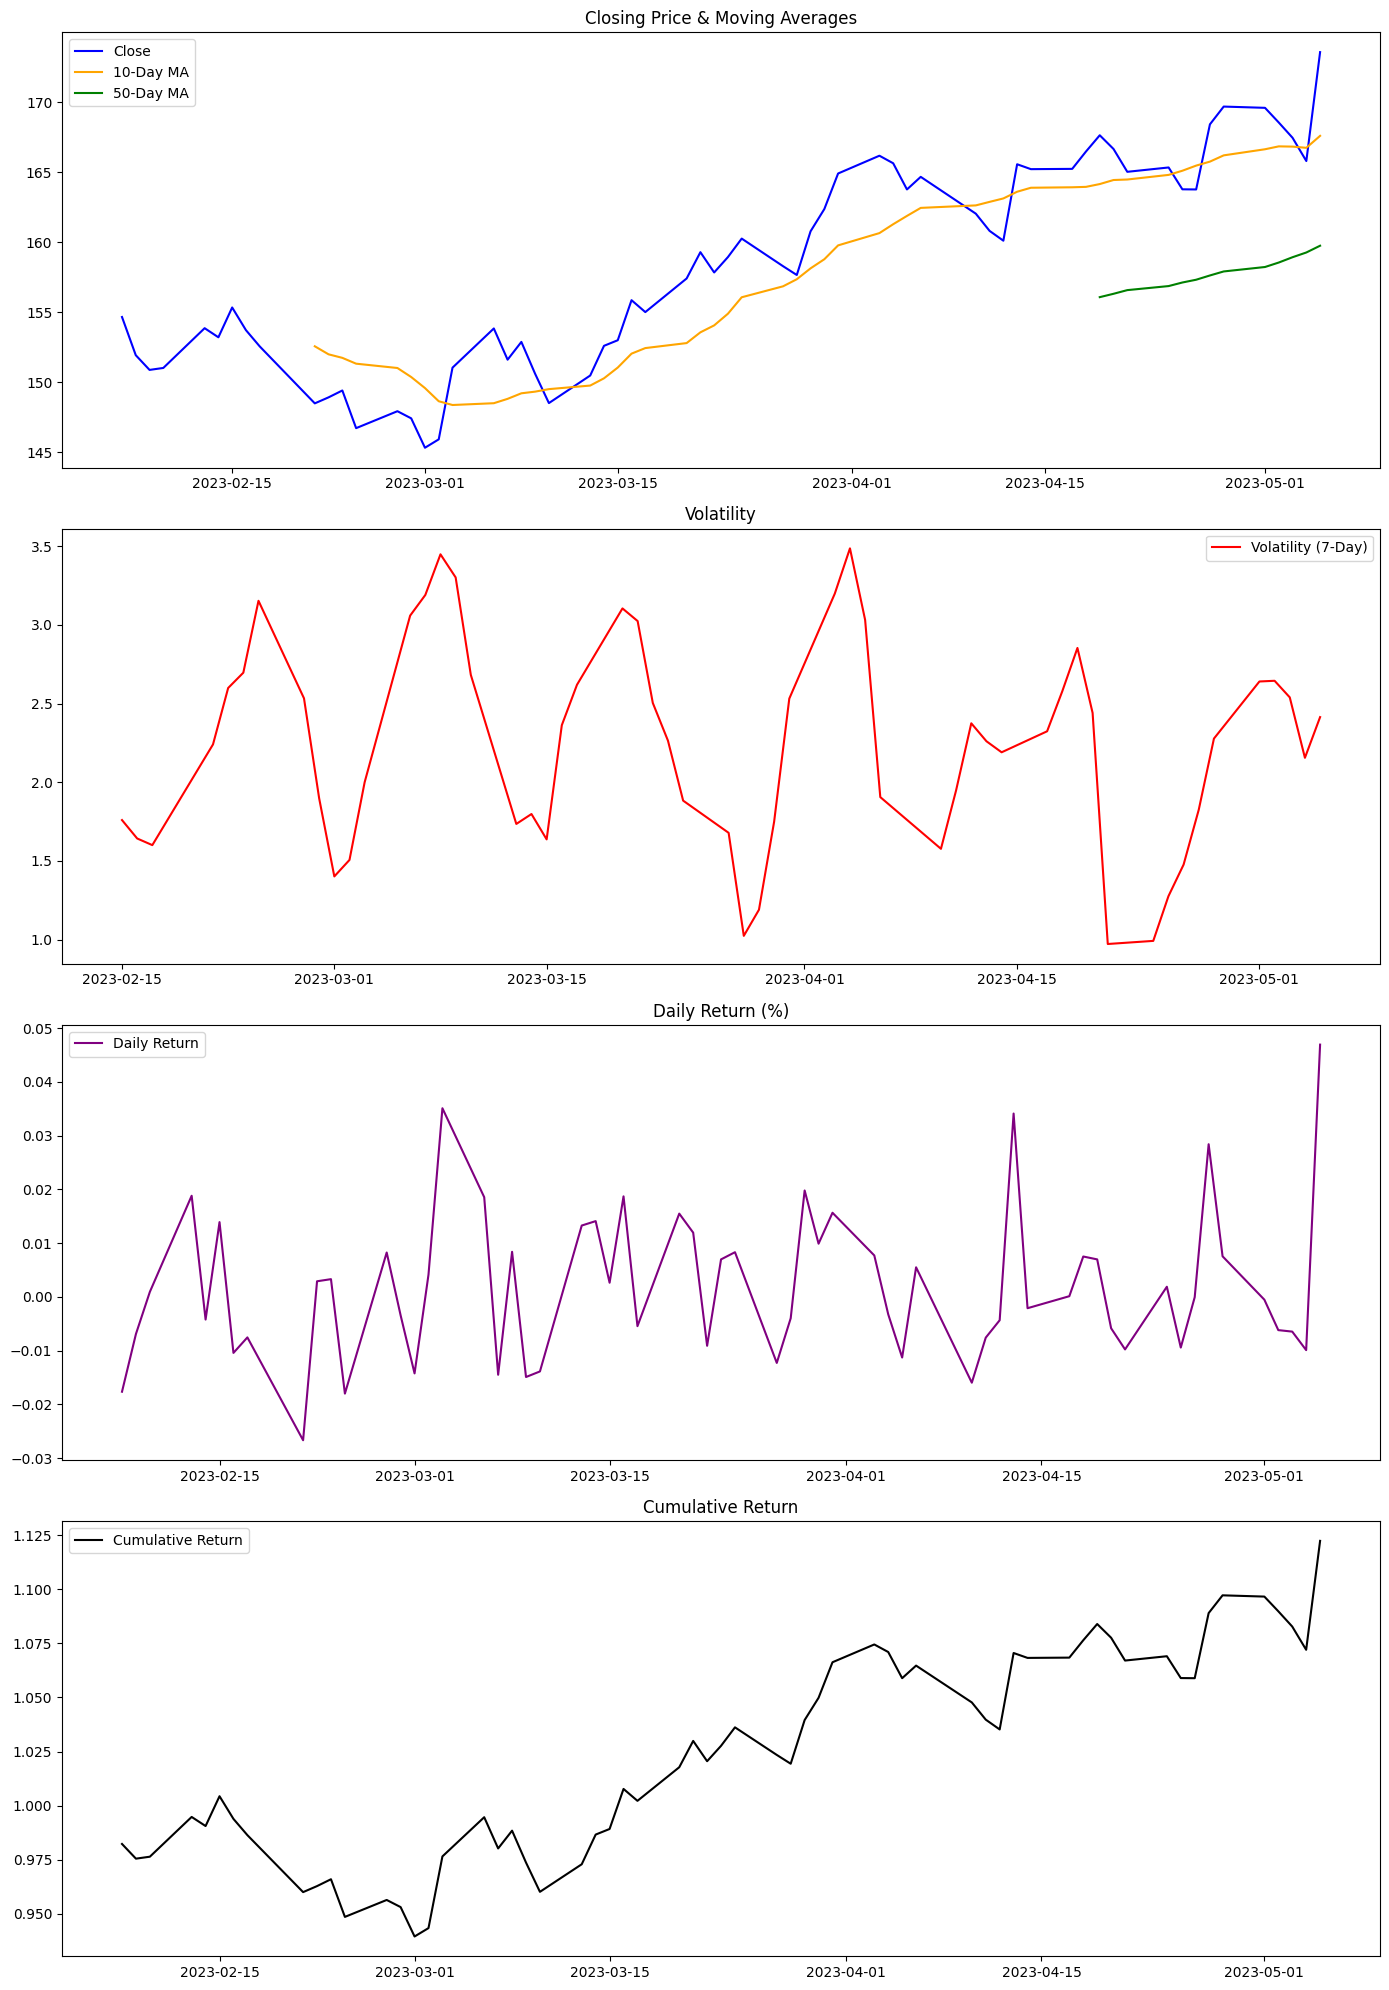

In [8]:
plt.figure(figsize=(14, 20))

# Closing Price & Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Close'], label='Close', color='blue')
plt.plot(df.index, df['MA_10'], label='10-Day MA', color='orange')
plt.plot(df.index, df['MA_50'], label='50-Day MA', color='green')
plt.title('Closing Price & Moving Averages')
plt.legend()

# Volatility
plt.subplot(4, 1, 2)
plt.plot(df.index, df['Volatility'], label='Volatility (7-Day)', color='red')
plt.title('Volatility')
plt.legend()

# Daily Returns
plt.subplot(4, 1, 3)
plt.plot(df.index, df['Daily_Return'], label='Daily Return', color='purple')
plt.title('Daily Return (%)')
plt.legend()

# Cumulative Returns
plt.subplot(4, 1, 4)
plt.plot(df.index, df['Cumulative_Return'], label='Cumulative Return', color='black')
plt.title('Cumulative Return')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
df.head(5)

,Ticker,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_50,Volatility,Daily_Return,Cumulative_Return
Date,,,,,,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN,NaN,NaN,NaN,NaN
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,NaN,NaN,NaN,-0.017653,0.982347
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,NaN,NaN,NaN,-0.006912,0.975558
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,NaN,NaN,NaN,0.000928,0.976463
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,NaN,NaN,NaN,0.018807,0.994827
